# In this project we will build a Machine Learning model to predict whether an indiviudal will have a stroke.  The data used in this project can be found on kaggle at the following link: https://www.kaggle.com/asaumya/healthcare-data#train_2v.csv

# In this notebook, we build and implement our Machine Learning model.  To view our initial data analysis, please see the notebook titled "Data_Analysis."

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

# Define file path to our data
stoke_data_relevant_features_and_label_file_path = os.path.join("..", "Data", "stroke_data_relevant_features_and_label.csv")

# Create dataframe from local csv file 
stroke_data_relevant_features_and_label = pd.read_csv(stoke_data_relevant_features_and_label_file_path)

# Previe dataframe
stroke_data_relevant_features_and_label.head()

,hypertension,heart_disease,ever_married,work_type,smoking_status,age,average_glucose_level,bmi,stroke
0,0,0,No,children,smokes,3.0,95.12,18.0,0
1,1,0,Yes,other,never smoked,58.0,87.96,39.2,0
2,0,0,No,other,smokes,8.0,110.89,17.6,0
3,0,0,Yes,other,formerly smoked,70.0,69.04,35.9,0
4,0,0,No,other,smokes,14.0,161.28,19.1,0


#### We want to one hot encode our categorical columns, so we will convert each 0 to "No," and each 1 to "Yes."

In [3]:
# Before we replace 0 and 1 with "no" and "yes",
# we should check to see if either of these numbers are present in the age column
number_of_people_age_0 = len(stroke_data_relevant_features_and_label[stroke_data_relevant_features_and_label["age"] == 0])
number_of_people_age_1 = len(stroke_data_relevant_features_and_label[stroke_data_relevant_features_and_label["age"] == 1])

print(f"Number of people of age 0: {number_of_people_age_0}")
print(f"Number of people of age 1: {number_of_people_age_1}")

Number of people of age 0: 0
Number of people of age 1: 34


In [4]:
# When we replace all values of 0 and 1 with "No" and "Yes,"
# we are going to replace ages of 1 with a value of "Yes"
# We will also replace the binary data in the stroke column with strings.
# We will therefore make copies of these rows to put back in the dataframe after our initial replacement

copy_of_data = pd.DataFrame()

# copy_of_data["age"] = stroke_data_relevant_features_and_label["age"]
# copy_of_data["stroke"] = stroke_data_relevant_features_and_label["stroke"]

copy_of_data_age = [stroke_data_relevant_features_and_label["age"]]
copy_of_data_stroke = [stroke_data_relevant_features_and_label["stroke"]]

In [5]:
# Replace each 0 with "No," and each 1 with "Yes."
stroke_data_relevant_features_and_label[["hypertension", "heart_disease"]].replace(0, "No", inplace=True)
stroke_data_relevant_features_and_label[["hypertension", "heart_disease"]].replace(1, "Yes", inplace=True)

# Preview dataframe after converting binary data to strings
stroke_data_relevant_features_and_label.head()

C:\Users\tyler\Anaconda3\lib\site-packages\pandas\core\frame.py:3795: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)
C:\Users\tyler\Anaconda3\lib\site-packages\pandas\core\frame.py:3795: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


,hypertension,heart_disease,ever_married,work_type,smoking_status,age,average_glucose_level,bmi,stroke
0,0,0,No,children,smokes,3.0,95.12,18.0,0
1,1,0,Yes,other,never smoked,58.0,87.96,39.2,0
2,0,0,No,other,smokes,8.0,110.89,17.6,0
3,0,0,Yes,other,formerly smoked,70.0,69.04,35.9,0
4,0,0,No,other,smokes,14.0,161.28,19.1,0


In [6]:
# Check to see if either if the values of 1 in the age column were changed
number_of_people_age_1 = len(stroke_data_relevant_features_and_label[stroke_data_relevant_features_and_label["age"] == 1])

print(f"Number of people of age 1: {number_of_people_age_1}")

Number of people of age 1: 34


In [7]:
# # Replace the values in the post-replacement age and stroke columns with the original values
# stroke_data_relevant_features_and_label["age"] = copy_of_data_age
# stroke_data_relevant_features_and_label["stroke"] = copy_of_data_stroke

# # Preview dataframe to confirm values in stroke column were fixed
# stroke_data_relevant_features_and_label.head()

In [8]:
# Confirm binary data proplerly converted
print(stroke_data_relevant_features_and_label["hypertension"].value_counts())
print(100*"-")
print(stroke_data_relevant_features_and_label["heart_disease"].value_counts())

0    39339
1     4061
Name: hypertension, dtype: int64
----------------------------------------------------------------------------------------------------
0    41338
1     2062
Name: heart_disease, dtype: int64


In [9]:
# Transform data to one hot encoded data
machine_ready_stroke_data = pd.get_dummies(stroke_data_relevant_features_and_label, columns=["hypertension", "heart_disease", "ever_married", "work_type", "smoking_status"])
machine_ready_stroke_data.head()

,age,average_glucose_level,bmi,stroke,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,ever_married_No,ever_married_Yes,work_type_Self-employed,work_type_children,work_type_other,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,3.0,95.12,18.0,0,1,0,1,0,1,0,0,1,0,0,0,1
1,58.0,87.96,39.2,0,0,1,1,0,0,1,0,0,1,0,1,0
2,8.0,110.89,17.6,0,1,0,1,0,1,0,0,0,1,0,0,1
3,70.0,69.04,35.9,0,1,0,1,0,0,1,0,0,1,1,0,0
4,14.0,161.28,19.1,0,1,0,1,0,1,0,0,0,1,0,0,1


In [10]:
# Import Maching Learning algorithms will we try out
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [11]:
# Create our features and label
X = np.array(machine_ready_stroke_data.drop(["stroke"], axis=1))
y = np.array(machine_ready_stroke_data["stroke"].values.reshape(-1,1))

We now have our features and labels, but the data is still imbalanced.

In [12]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=0.85, k_neighbors=4)
X_smote, y_smote = smote.fit_resample(X, y.ravel())

In [13]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_smote_train, X_smote_test, y_smote_train, y_smote_test = train_test_split(X_smote, y_smote, test_size = 0.2, random_state=3)

In [14]:
y_smote_train = y_smote_train.reshape(-1,1)

In [15]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier(max_depth=10, max_leaf_nodes=10)

In [16]:
classifier = classifier.fit(X=X_smote_train, y= y_smote_train)

In [17]:
classifier.score(X_smote_test, y_smote_test)

0.8192656477899677

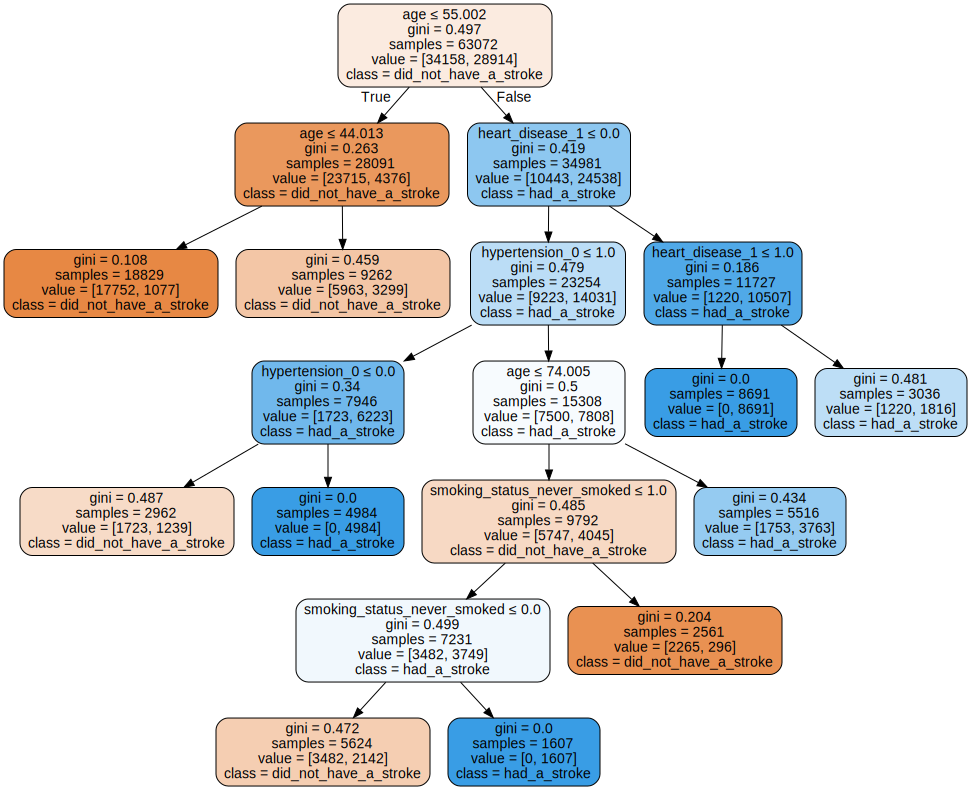

In [19]:
import graphviz

feature_names = ["age",
                 "average_glucose_levels",
                 "bmi",
                 "hypertension_0",
                 "hypertension_1",
                 "heart_disease_0",
                 "heart_disease_1",
                 "ever_married_No",
                 "ever_married_Yes",
                 "work_type_Self-employed",
                 "work_type_children",
                 "work_type_other",
                 "smoking_status_formerly_smoked",
                 "smoking_status_never_smoked",
                 "smoking_status_smokes"
                ]
class_names=["did_not_have_a_stroke", "had_a_stroke"]

dot_data = tree.export_graphviz(classifier, out_file=None, 
                      feature_names=feature_names,
                      class_names=class_names,  
                      filled=True, rounded=True,  
                      special_characters=True)
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=3)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create scale for features and label
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

# Scale features and labels
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [ ]:
models = []
models.append(("LR", LogisticRegression()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("CART", RandomForestClassifier()))
models.append(("SVM", SVC()))
models.append(("NB", GaussianNB()))

In [ ]:
# look at this
y_train.shape

In [ ]:
# from sklearn import model_selection

# # Evaluate each model in turn
# results = []
# names = []

# for name, model in models:
#     kfold = model_selection.KFold(n_splits=10, random_state=42)
#     cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")
#     results.append(cv_results)
#     names.append(name)
#     print(f"{name}: {cv_results.mean()}, {cv_results.std()}")

In [ ]:
# BEN GRAUER - put this in.  May need to adjust

classifier = tree.DecisionTreeClassifier(max_depth=10, max_leaf_nodes=10)

In [ ]:
classifier.fit(X=X_train, y=y_train)

In [ ]:
classifier.feature_importances_

In [ ]:
classifier.score(X=X_test, y=y_test)

In [ ]:
# import graphviz

# decision_tree_data = tree.export_graphviz(
#   classifier,
#   out_file=None,
#   feature_names=["age",
#                  "average_glucose_levels",
#                  "bmi",
#                  "hypertension_0",
#                  "hypertension_1",
#                  "heart_disease_0",
#                  "heart_disease_1",
#                  "ever_married_No",
#                  "ever_married_Yes",
#                  "work_type_Self-employed",
#                  "work_type_children",
#                  "work_type_other",
#                  "smoking_status_formerly_smoked",
#                  "smoking_status_never_smoked",
#                  "smoking_status_smokes"
#                 ],
#     class_names=["did_not_have_a_stroke", "had_a_stroke"],
#     filled=True,
#     rounded=False
# )

# graph = graphviz.Source(decision_tree_data)
# #graph

# #graph[size="7.75,10.25"]

In [ ]:
import graphviz

decision_tree_data = tree.export_graphviz(
  classifier,
  out_file=None,
  feature_names=["age",
                 "average_glucose_levels",
                 "bmi",
                 "hypertension_0",
                 "hypertension_1",
                 "heart_disease_0",
                 "heart_disease_1",
                 "ever_married_No",
                 "ever_married_Yes",
                 "work_type_Self-employed",
                 "work_type_children",
                 "work_type_other",
                 "smoking_status_formerly_smoked",
                 "smoking_status_never_smoked",
                 "smoking_status_smokes"
                ],
    class_names=["did_not_have_a_stroke", "had_a_stroke"],
    filled=True,
    rounded=False
)



graph = graphviz.Source(decision_tree_data)
graph

#graph[size="7.75,10.25"]

In [ ]:
dir(graph)

In [ ]:
dir(tree.export_graphviz)

In [ ]:
graph.render(format="png")

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [ ]:
# Visualizing both classes
plt.scatter(X[:, 0], X[:, 1])

In [ ]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=1)
rf = rf.fit(X_train, np.array(y_train))
rf.score(X_test, np.array(y_test))